## AlexNet

### ImageNet Classification with Deep Convolutional Neural Networks
https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

<img src="images/AlexNet.png" style="width=45px;height=45"/>

In [2]:
def alexnet(input_shape=(224,224,3), n_classes=1000, weights=None):
    input = Input(input_shape)
    
#     The first convolutional layer filters the 224×224×3 input image with 96 kernels of size 11×11×3 
#     with a stride of 4 pixels    
    x = Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)  # Using Batch Normalization instead of LRN (Local Response Normalization) for regularization
    x = MaxPool2D(pool_size=3, strides=2)(x)
    
#     The second convolutional layer takes as input the (response-normalized and pooled) 
#     output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.
    x = Conv2D(filters=256, kernel_size=5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    
#     The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs 
#     of the second convolutional layer without any intervening pooling or normalization layers.
    x = Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    
#     The fourth convolutional layer has 384 kernels of size 3 × 3 × 192 connected to the outputs of the 
#     third convolutional layer without any intervening pooling or normalization layers.
    x = Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    
#     The fifth convolutional layer has 256 kernels of size 3 × 3 × 192 connected to the outputs of the 
#     fourth convolutional layer without any intervening pooling or normalization layers.
    x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    
#     The first and second fully-connected layers have 4096 neurons each
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dense(units=4096, activation='relu')(x)
    
    x = Dropout(rate=0.5)(x) # Using Dropout to reduce overfitting.
    
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    
    if weights is not None:
        model.load_weights(weights)

    return model 

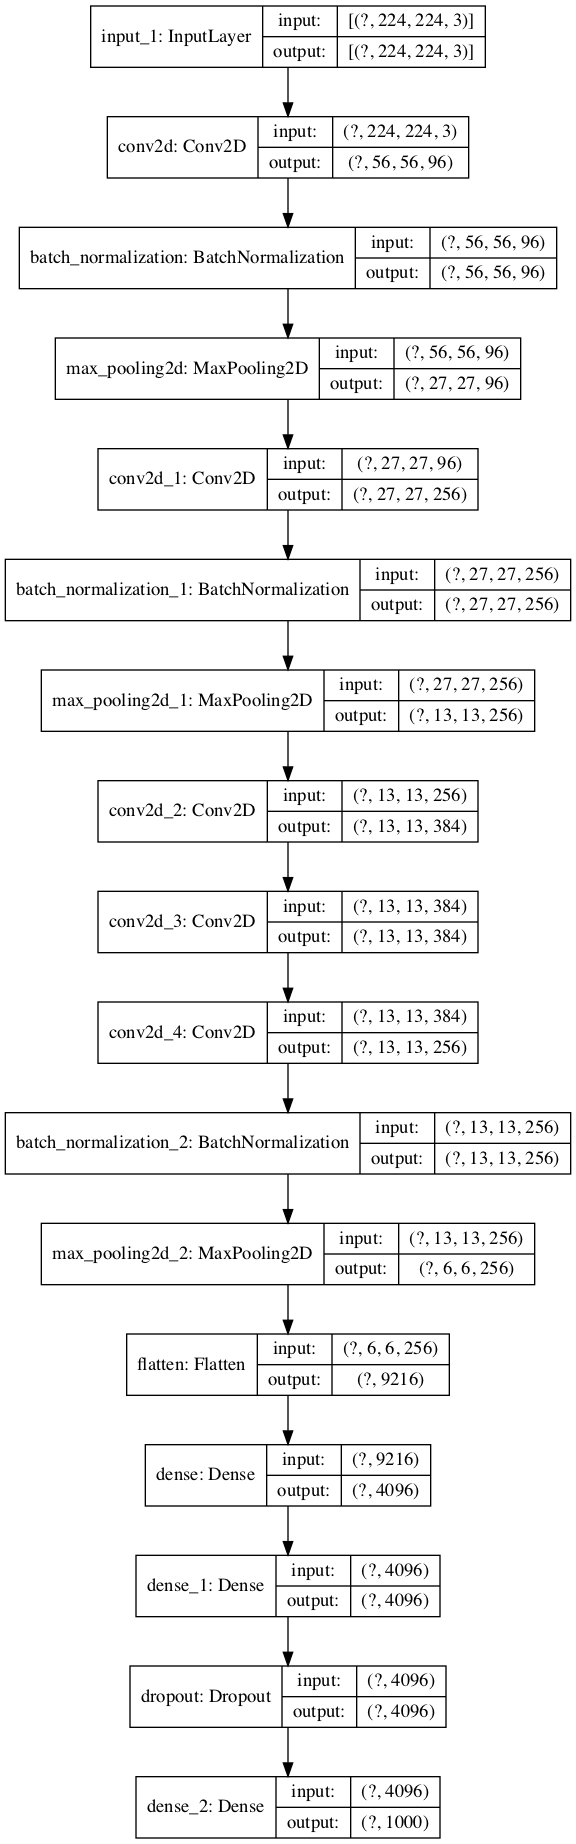

In [3]:
model = alexnet()
plot_model(model, to_file='AlexNetModel.png', show_shapes=True)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)      